### Importing Necessary Libraries and Packages

In [58]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report


### Importing Dataset

In [59]:
df = pd.read_csv('datasets/Retail_Store.csv', encoding='latin1')
pd.set_option('display.max_columns',None)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### Exploratory Data Analysis (EDA)

In [32]:
# Finding number of columns and rows
print("Number of Columns: ", df.shape[1])
print("Number of Rows: ", df.shape[0])

Number of Columns:  53
Number of Rows:  180519


Checking for any missing values in columns

In [33]:
def col_missing_values(df):
    for i in df.columns:
        if df[i].isna().sum()>0:
            print("Column",i,"is missing",str(df[i].isna().sum()),"values.")

col_missing_values(df)

Column Customer Lname is missing 8 values.
Column Customer Zipcode is missing 3 values.
Column Order Zipcode is missing 155679 values.
Column Product Description is missing 180519 values.


Dropping these columns, and other columns we deem have no valuable information

In [60]:
df = df.drop(columns = ['Customer Lname','Customer Zipcode','Order Zipcode','Product Description','Customer Email','Customer Password','Product Image'])

Use a heatmap to get an overview of the relationships and significance between 2 features

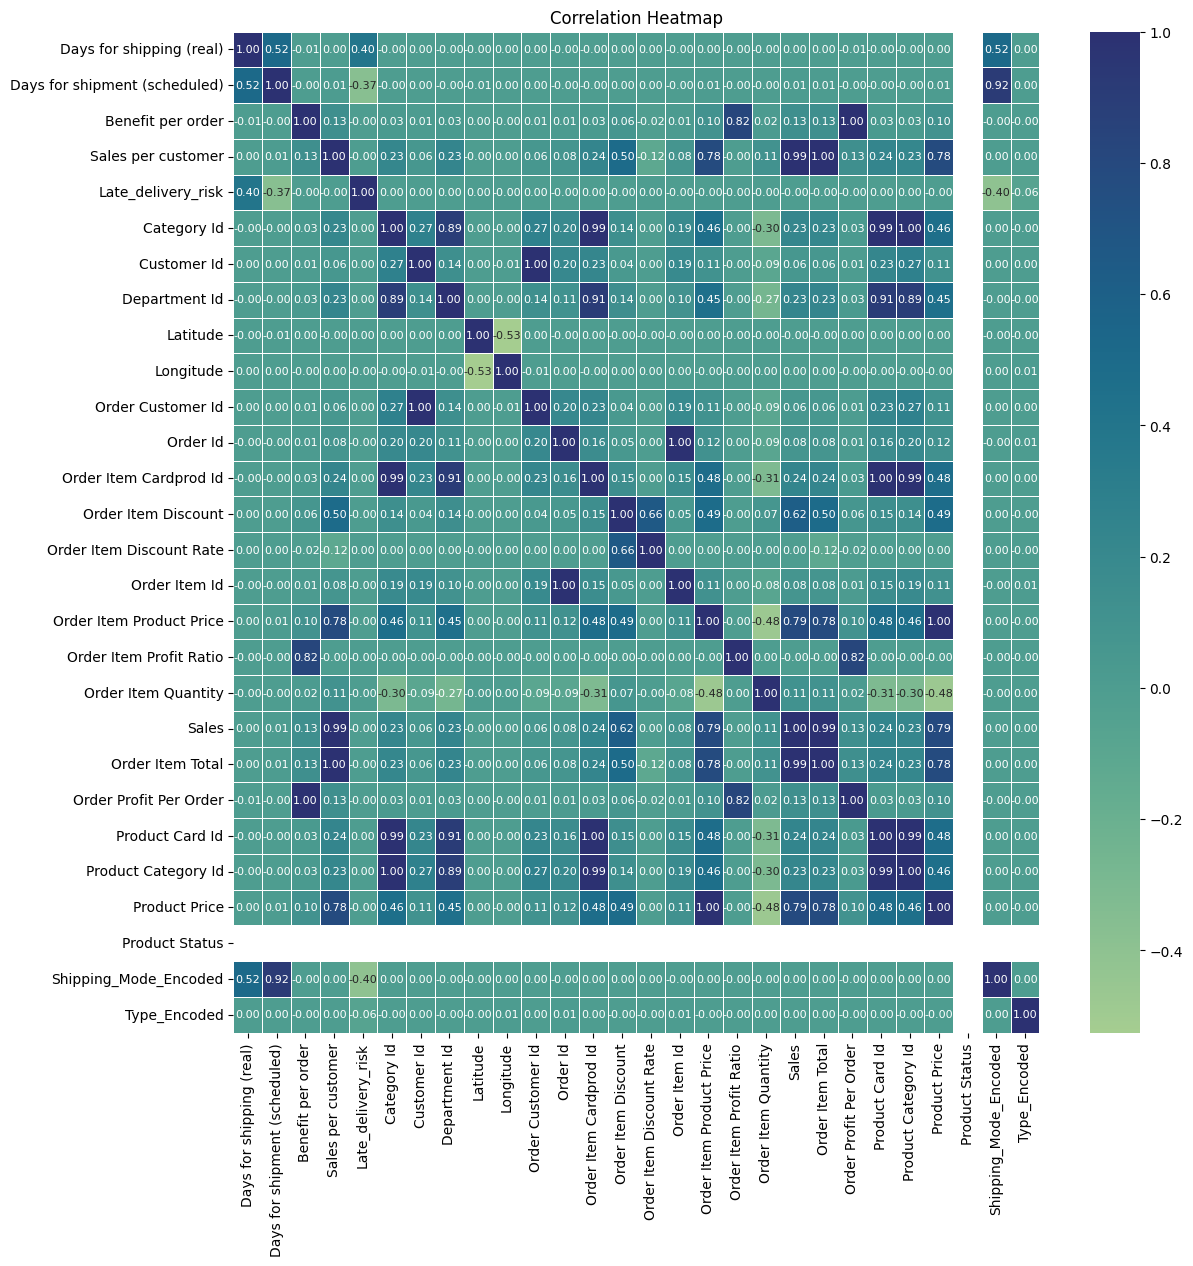

In [52]:
# Numeric_only=True, as .corr() can only take float or int 
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(13, 13))  
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5,annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

### Insights from Heatmap:
Duplicate Columns (Same data, different columns)
* **Benefit per Order**, Order Profit Per Order 
* **Product Price**, Order Item Product Price
* **Category Id**, Product Category Id, Product Card Id, Order item Cardprod Id
* **Sales**, Sales Per Customer, Order Item Total

In [ ]:
df['late_delivery'] = (df['Days for shipping (real)'] > df['Days for shipment (scheduled)'])

<Axes: xlabel='late_delivery', ylabel='Late_delivery_risk'>

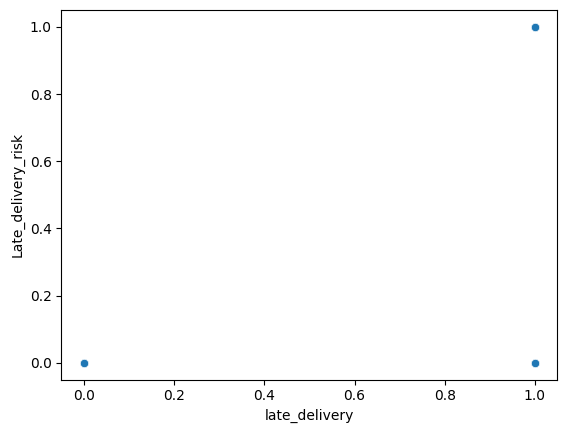

In [30]:
sns.scatterplot(x="late_delivery",y="Late_delivery_risk",data=df)

Label encoding Shipping Mode and Type 

In [ ]:
# Initialise Encoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the categorical column
df['Shipping_Mode_Encoded'] = label_encoder.fit_transform(df['Shipping Mode'])

# Display the mapping between original categories and encoded values
category_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

print(f"Category to Encoded Value Mapping:{category_mapping}")

Category to Encoded Value Mapping:{'First Class': 0, 'Same Day': 1, 'Second Class': 2, 'Standard Class': 3}


In [45]:
# Initialise Encoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the categorical column
df['Type_Encoded'] = label_encoder.fit_transform(df['Type'])

# Display the mapping between original categories and encoded values
category_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

print(f"Category to Encoded Value Mapping:{category_mapping}")

Category to Encoded Value Mapping:{'CASH': 0, 'DEBIT': 1, 'PAYMENT': 2, 'TRANSFER': 3}


Type (of Payment):
* Cash = 0
* Debit = 1
* Payment = 2
* Transfer = 3

Shipping Mode
* First Class = 0
* Same Day = 1
* Second Class = 2 
* Standard Class = 3


In [56]:
df = df.drop(columns = ['Type', 'Shipping Mode'])

In [65]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Segment,Customer State,Customer Street,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,shipping_date,order_date,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Consumer,PR,5365 Noble Nectar Island,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018-02-03 22:56:00,2018-01-31 22:56:00,2018,1,31,2018,2,3
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Consumer,PR,2679 Rustic Loop,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,2018-01-18 12:27:00,2018-01-13 12:27:00,2018,1,13,2018,1,18
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Consumer,CA,8510 Round Bear Gate,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,2018-01-17 12:06:00,2018-01-13 12:06:00,2018,1,13,2018,1,17
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Home Office,CA,3200 Amber Bend,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,2018-01-16 11:45:00,2018-01-13 11:45:00,2018,1,13,2018,1,16
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Corporate,PR,8671 Iron Anchor Corners,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2018-01-15 11:24:00,2018-01-13 11:24:00,2018,1,13,2018,1,15


## Feature Engineering 

In [63]:
# Converting date columns into date-time format for easier analysis

df['shipping_date'] = pd.to_datetime(df['shipping date (DateOrders)'])
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])

In [64]:
# Handling Time and date variables
df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).day
df['shipping_year'] = pd.DatetimeIndex(df['shipping_date']).year
df['shipping_month'] = pd.DatetimeIndex(df['shipping_date']).month
df['shipping_day'] = pd.DatetimeIndex(df['shipping_date']).day

In [66]:
# Chooisng which features to include into DecisionTree 
new_df_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                    'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                    'Order Country','Order City','Market','Delivery Status','order_day','order_month','order_year',
                    'shipping_day','shipping_month','shipping_year']
len(new_df_features)

21

In [70]:
new_df = df[new_df_features]
model_df = new_df
new_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,3,2,2018
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery,13,1,2018,18,1,2018
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time,13,1,2018,17,1,2018
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,16,1,2018
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,15,1,2018


In [72]:
#One-Hot encoding categotical variables in the data
model_df = pd.get_dummies(model_df)
model_df.shape

(180519, 3823)

## Setting up the Model

In [ ]:
model = DecisionTreeClassifier(max_depth=3,
                               random_state=42)
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(20,15))
tree.plot_tree(model, 
               feature_names = feat_names, 
               class_names=['Not Bankrupt', 'Bankrupt'],
               filled=True, #Blue represents Not Bankrupt  #Orange represents Bankrupt 
               fontsize=10)
plt.show()

In [74]:
y = model_df['Late_delivery_risk']
x = model_df.drop('Late_delivery_risk',axis=1)

x.shape, y.shape

((180519, 3822), (180519,))

DecisionTreeClassifier: accuracy = 1.000


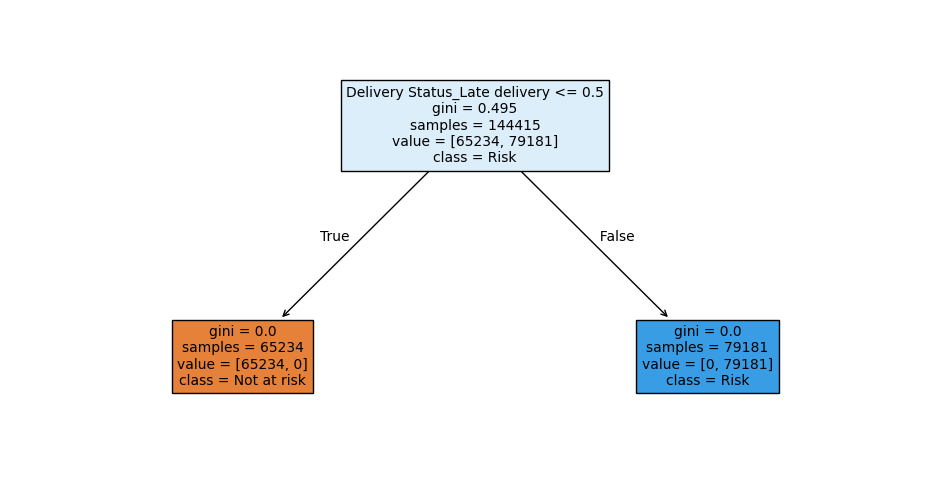

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


sk_model = DecisionTreeClassifier(max_depth=2, 
                                  random_state=1)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))

# plotting 
feature_names = x.columns.tolist()
plt.figure(figsize=(12, 6))
tree.plot_tree(sk_model,
               feature_names=feature_names,
               class_names=['Not at risk', 'Risk'],
               filled=True, 
               fontsize=10)
plt.show()
# clf = DecisionTreeClassifier(max_depth=2,random_state=42)
# clf.fit(x_train,y_train)